<a href="https://colab.research.google.com/github/NikithaMallisetty/NikithaMallisetty/blob/main/notebook6e4f8550c9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'college-placement:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4534488%2F7754914%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240910%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240910T083605Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D859498dfd756b76cc6323a713f5075da4469709e66d8241789a1bfd0b4ba3818b4bbd74a384ee83bfd0240e82c48ecc5d24627127ec27d5c5fa15c6dc408f321e9d93db7670a27fa62bc956d598fac18b0e371b95dd1ef2235a5428ebbcab7b422b1281ca0bc79dbdcec13bd96a840c300166720ecac589b81e153f27ab39def8f322bbb0fa7e4efa17121deade690c46ac7009f94891d5e23b2e2c588cc4a9719c5c8a178fbbed6be9531b71e13d85c5668ff1db7e7987a6a6508ccff740097a60705205d7f80c441e5a6e24f484f67606b67aa60b38a30d715736630ff30f3a6b62827df8a1e6ca48f30fa3422f46ef4f8cf46a13e2440dfb55cf0b15d8e4f'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 706 bytes downloaded
Downloaded and uncompressed: college-placement
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/college-placement/placement-dataset.csv


In [5]:
import numpy as np
import pandas as pd
df=pd.read_csv('/kaggle/input/college-placement/placement-dataset.csv')


In [6]:
df

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0
...,...,...,...,...
95,Chicago,4.3,200.0,0
96,New York,4.4,42.0,0
97,Los Angeles,6.7,182.0,1
98,Chicago,6.3,103.0,1


In [7]:
df = df[['cgpa', 'iq', 'placement']]
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,NaN,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       92 non-null     float64
 1   iq         96 non-null     float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [9]:
df=df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       88 non-null     float64
 1   iq         88 non-null     float64
 2   placement  88 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 2.8 KB


In [11]:
df.shape

(88, 3)

In [12]:
import matplotlib.pyplot as plt

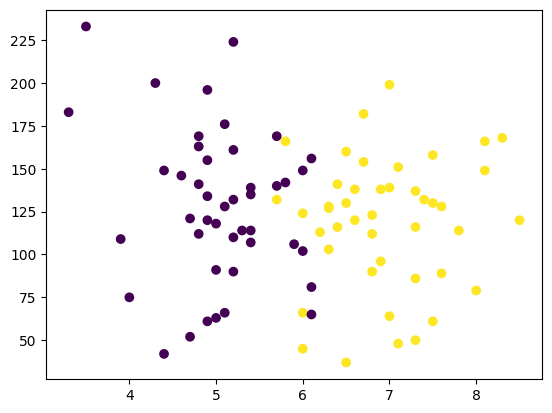

In [13]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [14]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [15]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
3,7.4,132.0
4,5.8,142.0
5,7.1,48.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [16]:
y

,placement
0,1
1,0
3,1
4,0
5,1
...,...
95,0
96,0
97,1
98,1


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [19]:
x_train

,cgpa,iq
94,4.7,52.0
64,7.0,64.0
59,4.8,112.0
19,5.2,132.0
9,5.1,66.0
...,...,...
11,6.9,138.0
86,5.1,128.0
70,6.3,127.0
53,8.3,168.0


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()

In [22]:
x_train=scaler.fit_transform(x_train)

In [23]:
x_train

array([[-1.17321828, -1.75115414],
       [ 0.84356281, -1.44849341],
       [-1.08553214, -0.23785047],
       [-0.7347876 ,  0.26658409],
       [-0.82247374, -1.39804995],
       [ 1.19430735,  0.26658409],
       [ 0.58050441,  1.52767048],
       [-0.55941534, -0.36395911],
       [-0.55941534, -0.18740702],
       [-0.7347876 , -0.28829393],
       [-0.91015987, -0.76750676],
       [-0.29635693,  1.19978802],
       [-0.03329853, -0.49006775],
       [-1.08553214,  1.19978802],
       [ 0.58050441,  0.8214621 ],
       [ 0.49281827,  0.41791445],
       [ 1.36967961,  0.16569717],
       [-1.08553214,  1.04845765],
       [-0.99784601, -0.03607665],
       [-0.99784601,  0.31702754],
       [-0.7347876 , -0.79272849],
       [ 0.66819054, -0.79272849],
       [ 2.15885482, -0.03607665],
       [-0.55941534,  0.34224927],
       [-0.91015987, -1.47371514],
       [-0.29635693,  0.46835791],
       [ 0.22975987,  0.16569717],
       [ 0.0543876 , -1.42327168],
       [-1.43627668,

In [24]:
x_test= scaler.transform(x_test)

In [25]:
x_test

array([[ 0.93124894, -1.85204106],
       [-0.7347876 ,  2.58698305],
       [ 1.36967961, -0.81795021],
       [-0.91015987, -0.0865201 ],
       [-1.43627668,  0.69535346],
       [ 1.28199348,  0.92234901],
       [-0.55941534,  0.44313618],
       [-1.26090441,  0.61968828],
       [-1.52396281,  1.98166158]])

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
clf=LogisticRegression()

In [28]:
clf.fit(x_train,y_train)

LogisticRegression()

In [29]:
y_pred=clf.predict(x_test)

In [30]:
y_test

,placement
5,1
16,0
42,1
67,0
88,0
91,1
12,0
39,0
95,0


In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test,y_pred)

1.0

In [33]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

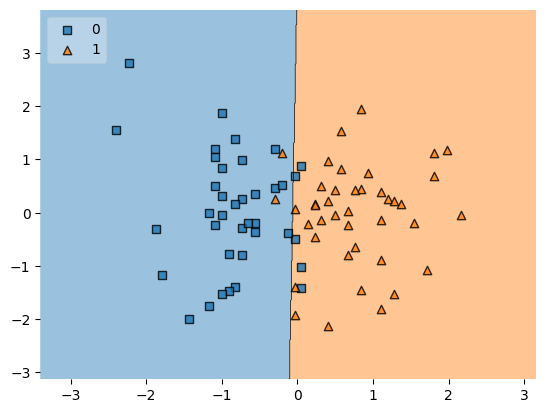

In [34]:
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)

In [35]:
import pickle

In [36]:
pickle.dump(clf,open('model.pkl','wb'))